<a href="https://colab.research.google.com/github/CheshtaG/Customer-Churn/blob/main/01_eda_and_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)


In [ ]:
df = pd.read_csv("/content/Churn_raw.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print("Shape:", df.shape)

print("\nInfo:")
df.info()

print("\nSample rows:")
df.head()


Shape: (7043, 21)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
print("Missing values per column:")
print(df.isna().sum())

print("\nBlank-string counts per column:")
blank_counts = (df.applymap(lambda x: isinstance(x, str) and x.strip() == "")).sum()
print(blank_counts)


Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Blank-string counts per column:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn

/tmp/ipython-input-1661485997.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  blank_counts = (df.applymap(lambda x: isinstance(x, str) and x.strip() == "")).sum()


In [ ]:
if "TotalCharges" in df.columns:
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
    print(df["TotalCharges"].isna().sum(), "missing after conversion")

    df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())


11 missing after conversion


In [ ]:
if "customerID" in df.columns:
    customer_ids = df["customerID"]
    df = df.drop(columns=["customerID"])


In [ ]:
if "Churn" in df.columns:
    print("Churn value counts before mapping:")
    print(df["Churn"].value_counts())

    df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
    print("\nChurn value counts after mapping:")
    print(df["Churn"].value_counts())


Churn value counts before mapping:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn value counts after mapping:
Churn
0    5174
1    1869
Name: count, dtype: int64


Churn counts:
 Churn
0    5174
1    1869
Name: count, dtype: int64

Churn rate: 26.54 %


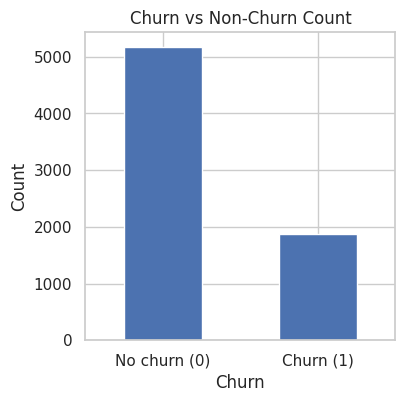

In [ ]:
churn_counts = df["Churn"].value_counts()
churn_rate = df["Churn"].mean()

print("Churn counts:\n", churn_counts)
print("\nChurn rate:", round(churn_rate * 100, 2), "%")

plt.figure(figsize=(4,4))
churn_counts.plot(kind="bar")
plt.title("Churn vs Non-Churn Count")
plt.xticks([0,1], ["No churn (0)", "Churn (1)"], rotation=0)
plt.ylabel("Count")
plt.show()


In [ ]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "bool"]).columns.tolist()

print("Numeric columns:", numeric_cols)
print("\nCategorical columns:", categorical_cols)


Numeric columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [ ]:
df[numeric_cols].describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,0.265370
std,0.368612,24.559481,30.090047,2265.270398,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


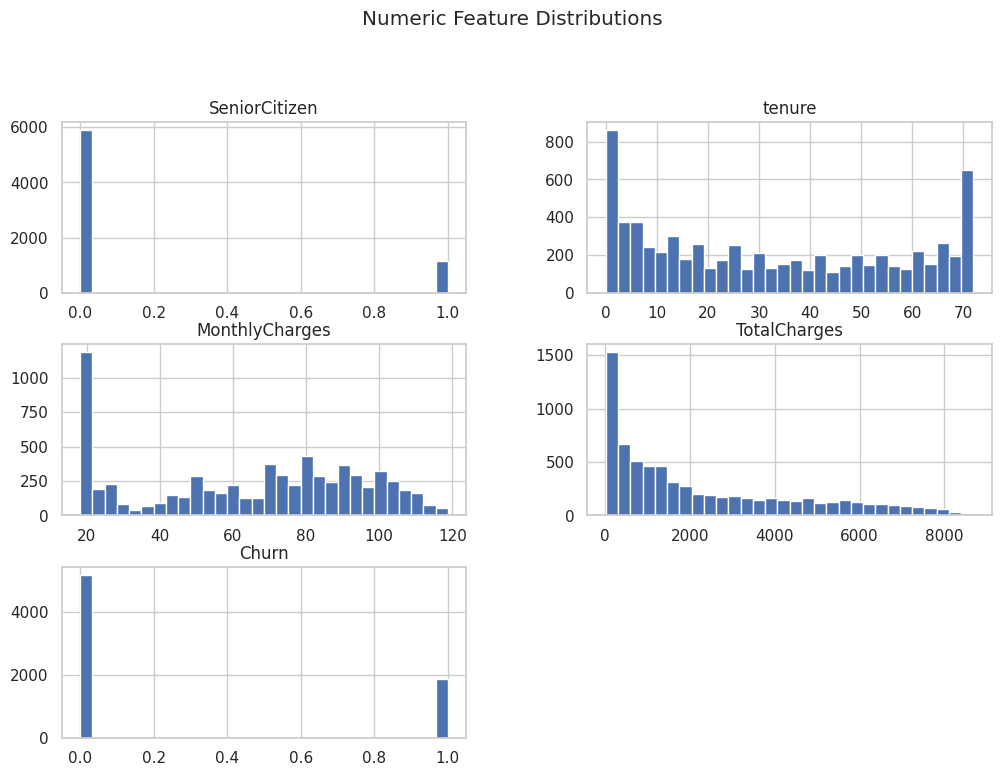

In [ ]:
df[numeric_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Numeric Feature Distributions", y=1.02)
plt.show()


In [ ]:
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())



Column: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64

Column: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Column: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Column: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Column: MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Column: InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Column: OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Column: OnlineBackup
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

Column: DeviceProtection
DeviceProtection
No                     3095
Yes                    2422
No internet service   

In [ ]:
def churn_rate_by_category(col):
    temp = (
        df.groupby(col)["Churn"]
        .mean()
        .sort_values(ascending=False)
        .to_frame("churn_rate")
    )
    temp["count"] = df.groupby(col)["Churn"].size()
    return temp

for col in categorical_cols:
    print(f"\n=== {col} ===")
    display(churn_rate_by_category(col))



=== gender ===


,churn_rate,count
gender,,
Female,0.269209,3488
Male,0.261603,3555



=== Partner ===


,churn_rate,count
Partner,,
No,0.329580,3641
Yes,0.196649,3402



=== Dependents ===


,churn_rate,count
Dependents,,
No,0.312791,4933
Yes,0.154502,2110



=== PhoneService ===


,churn_rate,count
PhoneService,,
Yes,0.267096,6361
No,0.249267,682



=== MultipleLines ===


,churn_rate,count
MultipleLines,,
Yes,0.286099,2971
No,0.250442,3390
No phone service,0.249267,682



=== InternetService ===


,churn_rate,count
InternetService,,
Fiber optic,0.418928,3096
DSL,0.189591,2421
No,0.074050,1526



=== OnlineSecurity ===


,churn_rate,count
OnlineSecurity,,
No,0.417667,3498
Yes,0.146112,2019
No internet service,0.074050,1526



=== OnlineBackup ===


,churn_rate,count
OnlineBackup,,
No,0.399288,3088
Yes,0.215315,2429
No internet service,0.074050,1526



=== DeviceProtection ===


,churn_rate,count
DeviceProtection,,
No,0.391276,3095
Yes,0.225021,2422
No internet service,0.074050,1526



=== TechSupport ===


,churn_rate,count
TechSupport,,
No,0.416355,3473
Yes,0.151663,2044
No internet service,0.074050,1526



=== StreamingTV ===


,churn_rate,count
StreamingTV,,
No,0.335231,2810
Yes,0.300702,2707
No internet service,0.074050,1526



=== StreamingMovies ===


,churn_rate,count
StreamingMovies,,
No,0.336804,2785
Yes,0.299414,2732
No internet service,0.074050,1526



=== Contract ===


,churn_rate,count
Contract,,
Month-to-month,0.427097,3875
One year,0.112695,1473
Two year,0.028319,1695



=== PaperlessBilling ===


,churn_rate,count
PaperlessBilling,,
Yes,0.335651,4171
No,0.163301,2872



=== PaymentMethod ===


,churn_rate,count
PaymentMethod,,
Electronic check,0.452854,2365
Mailed check,0.191067,1612
Bank transfer (automatic),0.167098,1544
Credit card (automatic),0.152431,1522


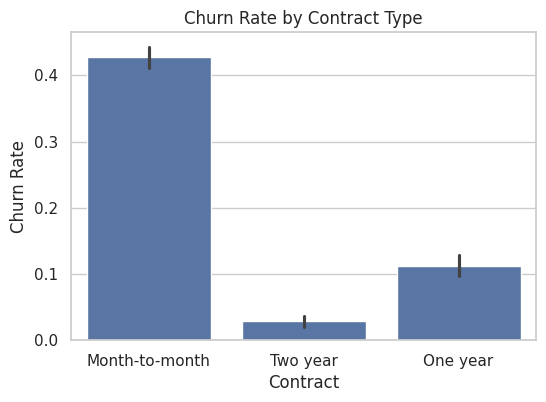

In [ ]:
if "Contract" in df.columns:
    plt.figure(figsize=(6,4))
    sns.barplot(
        x="Contract",
        y="Churn",
        data=df,
        estimator=np.mean,
        order=df["Contract"].value_counts().index
    )
    plt.title("Churn Rate by Contract Type")
    plt.ylabel("Churn Rate")
    plt.show()


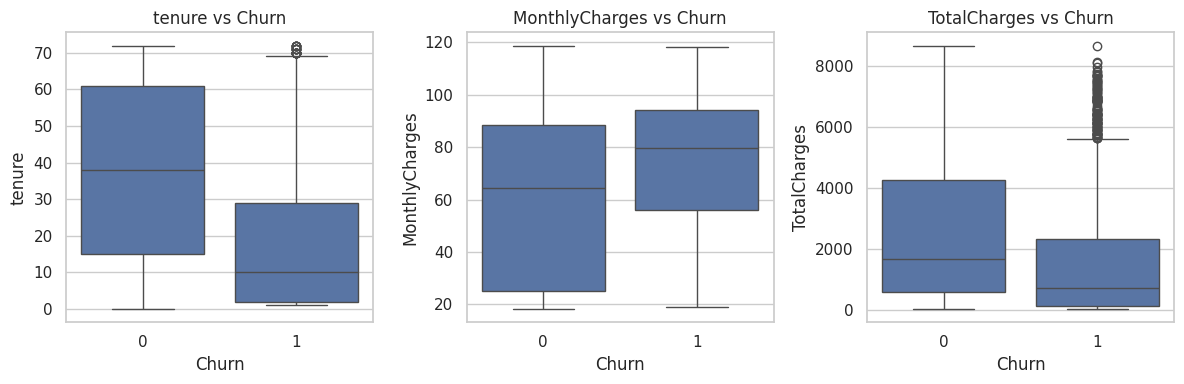

In [ ]:
plt.figure(figsize=(12, 4))

for i, col in enumerate(["tenure", "MonthlyCharges", "TotalCharges"]):
    if col in df.columns:
        plt.subplot(1, 3, i+1)
        sns.boxplot(x="Churn", y=col, data=df)
        plt.title(f"{col} vs Churn")

plt.tight_layout()
plt.show()


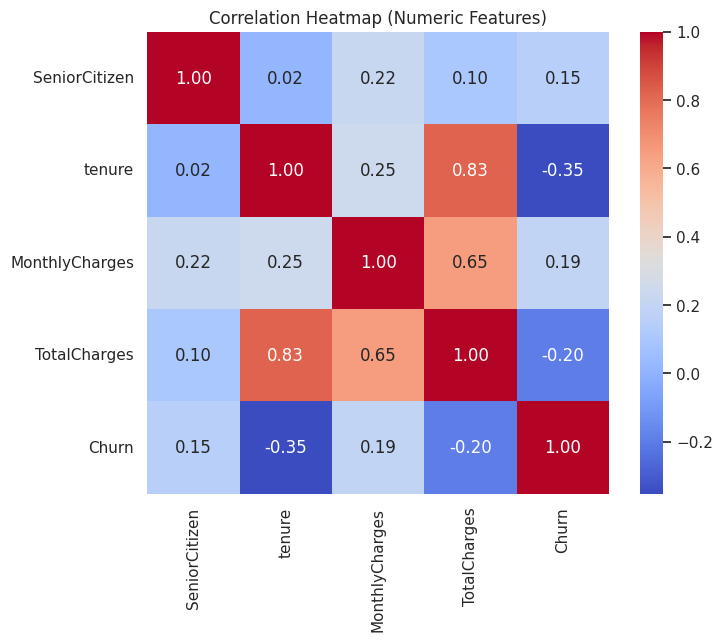

In [ ]:
plt.figure(figsize=(8,6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [ ]:
print("Final shape:", df.shape)
print("\nFinal dtypes:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isna().sum())

Final shape: (7043, 20)

Final dtypes:
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

Missing values per column:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
Payment

In [ ]:
df.to_csv("Churn_clean.csv", index=False)
print("Saved cleaned dataset as Churn_clean.csv in current Colab directory.")


Saved cleaned dataset as Churn_clean.csv in current Colab directory.
